In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/home/blaso/OneDrive/Oxford/PhD/side_projects/COVID-19 Epidemic Model/Mexico-datos/codigo'

In [110]:
%time df = pd.read_csv( '../datos_abiertos/raw/datos_abiertos_20200621.zip', compression='zip' )
df.shape

CPU times: user 1.28 s, sys: 91.7 ms, total: 1.37 s
Wall time: 1.37 s


(479528, 35)

In [113]:
idx_confirmados = df['RESULTADO'] == 1
idx_defunciones = idx_confirmados & (df['FECHA_DEF'] != '9999-99-99')

# Deaths
df_c = df.loc[idx_confirmados]
df_c.shape

(180545, 35)

range: 0-25000


/home/blaso/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


[Text(0, 0.5, 'Age-Group'),
 (-1500, 1500),
 Text(0.5, 0, 'Population'),
 Text(0.5, 1.0, 'Population Pyramid')]

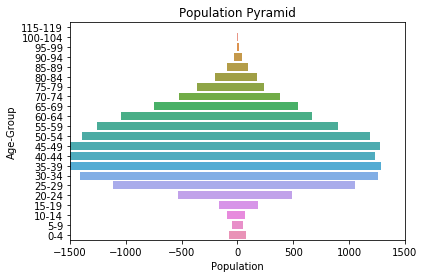

In [133]:
i = 0
N = 25000
df_ct = df_c.iloc[i*N:(i+1)*N]

print( 'range: {}-{}'.format(i*N, (i+1)*N))

cat_sexo={1: 'MUJER', 2: 'HOMBRE', 99: 'NO ESPECIFICADO'}

df_cte = df_ct[['SEXO', 'EDAD', 'ID_REGISTRO']]
df_cte['EDAD'] = df_cte['EDAD'].apply(lambda x: x // 5)

gby = (df_cte.groupby(['SEXO', 'EDAD'])
       .count()['ID_REGISTRO']
       .unstack(level=0))

# reindex = True
# if reindex:
#     idx = range(gby.index.min(), gby.index.max() + 1)
#     gby = gby.reindex(idx)

gby = gby.fillna(0).astype('int')
gby.index = gby.index.map(lambda x: f'{5*x}-{5*x+4}')
gby = gby.rename(columns=cat_sexo)

# Prepare for histogram
gby = gby.reset_index()
gby['HOMBRE'] = -gby['HOMBRE']
gby = gby.reindex(index=gby.index[::-1])

bar_plot = sns.barplot(x='HOMBRE', y='EDAD', data=gby)#, order=AgeClass)
bar_plot = sns.barplot(x='MUJER', y='EDAD', data=gby)

bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid", xlim=(-1500, 1500))

ToDO: 
- Make these bar plots in a panel where each panel shows the evolution of the pyramid over time (normalized by population on age strata)

In [ ]:
# X_train_data = pd.DataFrame({'Age':[0,2,4,13,35,-1,54]})

# bins= [0,2,4,13,20,110]
# labels = ['Infant','Toddler','Kid','Teen','Adult']
# X_train_data['AgeGroup'] = pd.cut(X_train_data['Age'], bins=bins, labels=labels, right=False)
# print (X_train_data)
#    Age AgeGroup
# 0    0   Infant
# 1    2  Toddler
# 2    4      Kid
# 3   13     Teen
# 4   35    Adult
# 5   -1      NaN
# 6   54    Adult